# Skin Cancer Detection
### By Team Machine Minds
#### Team Members
- Shyamron Dongol
- Anjan Khadka
- Anish Shilpakar
- Sudip Shrestha
#### Dataset Used:
Original Dataset: [ISIC skin cancer image dataset labelled](https://www.kaggle.com/datasets/riyaelizashaju/isic-skin-disease-image-dataset-labelled)  
Our Own Modified Dataset: [Own Data](https://www.kaggle.com/datasets/anjaankhadka118/skindiseases?select=dataset_1200_complete)
**Source:** Kaggle.com
#### Disease Categories:
This dataset is to facilitate image classification for 8 skin diseases along with normal condition:
1. Actinic keratosis
2. Basal cell carcinoma
3. Benign keratosis
4. Dermatofibroma
5. Melanocytic nevus
6. Melanoma
7. Squamous cell carcinoma
8. Vascular lesion
9. Normal Condition
#### Tools and Technology Used: 
- **Model:** Resnet 152  
- **Programming Language:** Python
- **Deep Learning Framework:** Fast.ai


#### Methodology
- Initially we tried training with the original dataset but it resulted in poor f1 score as the dataset was highly imbalanced
- Then we tried undersampling all the classes to ~200 samples i-e no of samples in minority class. Much improvements weren't seen during undersampling
- Finally we performed data augmentation and downsampling to ~ 1000 samples in each class. Some improvements were seen in f1 score

## Data Augmentation Section

The four classes 'Actinic keratosis', 'Squamous cell carcinoma','Vascular lesion','Dermatofibroma' had less than 1000 images so these were upsampled to ~1000 images using image augmentation techniques  
The remaining 4 classes had more than 1000 samples so we only considered subset of these dataset so that all classes are balanced during training

For image augmentation, we performed the following 3 steps:
1. Rotation by 90 degrees
2. Rotation by 270 degress
3. Flipping images i-e mirroring in Y-axis
4. Added Gaussian Noise

In [ ]:
import os
from os import listdir
from PIL import Image, ImageFilter
import shutil
import random
import cv2
import numpy as np
from skimage.util import random_noise

def add_gaussian_noise(image):
    cv_image = np.array(image) 
    # Convert RGB to BGR 
    
    image = cv2.cvtColor(cv_image, cv2.COLOR_RGB2BGR)
    noisy_image = random_noise(image, mode='gaussian', seed=None, clip=True)
    noisy_image = np.array(255*noisy_image, dtype = 'uint8')
    noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)
    return Image.fromarray(noisy_image)


def double_data(src,dst):
    files = os.listdir(src)
    for file in files:
        val = random.choice([90, 270])
        img = Image.open(src+"/"+file)
        if random.random() < .3:
#             img = img.filter(ImageFilter.GaussianBlur(radius = 3))
            img = add_gaussian_noise(img)
        img.save(dst+"/"+file)
        img = img.rotate(val,expand = True)
        img.save(dst+"/"+file.split(".")[0]+"_rot.jpg")

def upsample_200(src,dst):
    files = os.listdir(src)
    for i,file in enumerate(files):
        if i<200:
            val = random.choice([90, 270])
            img = Image.open(src+"/"+file)
            if random.random() < .3:
#                 img = img.filter(ImageFilter.GaussianBlur(radius = 3))
                img = add_gaussian_noise(img)

            img.save(dst+"/"+file)
            img = img.rotate(val,expand = True)
            img.save(dst+"/"+file.split(".")[0]+"_rot.jpg")
        else:
            shutil.copy(src+"/"+file,dst+"/"+file)
            
def limit_to_1200(src,dst):
    files = os.listdir(src)
    for i,file in enumerate(files):
        img = Image.open(src+"/"+file)
        if random.random() < .3:
#             img = img.filter(ImageFilter.GaussianBlur(radius = 3))
                img = add_gaussian_noise(img)
        img.save(dst+"/"+file.split(".")[0]+".jpg")
        if i>1200:
            break
#         shutil.copy(src+"/"+file,dst+"/"+file)


def times_four_data(src,dst):
    files = os.listdir(src)
    for file in files:
#         val = random.choice([True, False])
        img = Image.open(f"{src}/{file}")
        img_cp = img.copy()
        if random.random() < .3:
#              img_cp = img.filter(ImageFilter.GaussianBlur(radius = 3))
            img_cp = add_gaussian_noise(img)
        img_cp.save(dst+"/"+file)
        img1 = img.rotate(90,expand = True)
        if random.random() < .3:
#             img1 = img1.filter(ImageFilter.GaussianBlur(radius = 3))
            img1 = add_gaussian_noise(img1)
        img1.save(dst+"/"+file.split(".")[0]+"_90.jpg")
        img2 = img.rotate(270,expand = True)
        if random.random() < .3:
#             img2 = img2.filter(ImageFilter.GaussianBlur(radius = 3))
            img2 = add_gaussian_noise(img2)
        img2.save(dst+"/"+str(file.split(".")[0])+"_270.jpg")
        
#         if val:
#         img3 = img.mirror()
        img3= img.transpose(Image.FLIP_LEFT_RIGHT)
        if random.random() < .3:
#             img3 = img3.filter(ImageFilter.GaussianBlur(radius = 3))
            img3 = add_gaussian_noise(img3)
        img3.save(dst+"/"+str(file.split(".")[0])+"_mir.jpg")
#         else:
#             img3 = img.flip()
#             img3.save(dst+"/"+str(file.split(".")[0])+"_flp.jpg")
def times_ten_data(src,dst):
    files = os.listdir(src)
    for file in files:
#         val = random.choice([True, False])
        img = Image.open(f"{src}/{file}")
        img = img.convert('RGB')
        img.save(dst+"/"+file)
        img1 = img.rotate(90,expand = True)
        img1.save(dst+"/"+file.split(".")[0]+"_90.jpg")
        img2 = img.rotate(270,expand = True)
        img2.save(dst+"/"+str(file.split(".")[0])+"_270.jpg")
        
#         if val:
#         img3 = img.mirror()
        img3= img.transpose(Image.FLIP_LEFT_RIGHT)
        img3.save(dst+"/"+str(file.split(".")[0])+"_mir.jpg")
        img4 = img.transpose(Image.FLIP_TOP_BOTTOM)
        img4.save(dst+"/"+str(file.split(".")[0])+"_flp.jpg")
        
        img = Image.open(f"{src}/{file}")
        img = img.convert('RGB')
#         img = img.filter(ImageFilter.GaussianBlur(radius = 3))
        img = add_gaussian_noise(img)
        img.save(dst+"/"+file)
        img1 = img.rotate(90,expand = True)
        img1.save(dst+"/"+file.split(".")[0]+"_90_noise.jpg")
        img2 = img.rotate(270,expand = True)
        img2.save(dst+"/"+str(file.split(".")[0])+"_270_noise.jpg")
        
#         if val:
#         img3 = img.mirror()
        img3= img.transpose(Image.FLIP_LEFT_RIGHT)
        img3.save(dst+"/"+str(file.split(".")[0])+"_mir_noise.jpg")
        img4 = img.transpose(Image.FLIP_TOP_BOTTOM)
        img4.save(dst+"/"+str(file.split(".")[0])+"_flp_noise.jpg")

        

# folder = "/kaggle/input/isic-skin-disease-image-dataset-labelled/ISIC_Labelled/Melanoma"
# save_dir = "/kaggle/working/ISIC_1000"
# generate_more_data(folder,3,save_dir)
    

In [ ]:
in_path = "/kaggle/input/isic-skin-disease-image-dataset-labelled/ISIC_Labelled/"
out_path = "/kaggle/working/ISIC_1000/"
upsample_200(in_path+"Actinic keratosis",out_path+"Actinic keratosis")
limit_to_1200(in_path+"Basal cell carcinoma",out_path+"Basal cell carcinoma")
limit_to_1200(in_path+"Benign keratosis",out_path+"Benign keratosis")
times_four_data(in_path+"Dermatofibroma",out_path+"Dermatofibroma")
limit_to_1200(in_path+"Melanocytic nevus",out_path+"Melanocytic nevus")
limit_to_1200(in_path+"Melanoma",out_path+"Melanoma")
double_data(in_path+"Squamous cell carcinoma",out_path+"Squamous cell carcinoma")
times_four_data(in_path+"Vascular lesion",out_path+"Vascular lesion")

In [ ]:
import shutil
shutil.make_archive("dataset_1200.zip", 'zip',"/kaggle/working/ISIC_1000")

In [ ]:
import shutil
shutil.make_archive("dataset_1200", 'zip',"/kaggle/working/ISIC_1000")

In [ ]:
from IPython.display import FileLink
FileLink(r'dataset_1200.zip')

## Model Training Section

Necessary imports

In [2]:
import numpy as np
import pandas as pd
import os
from fastai.vision.all import *

Creating dataset.csv and labels.csv based on the images dataset

In [2]:
DATASET_PATH = '/kaggle/input/skindiseases/dataset_1200_complete/'

In [6]:
folders  = os.listdir(DATASET_PATH)
folders.sort()
print(folders)
df_list = []
labels_list = []
for i,classes in enumerate(folders):
  labels_list.append([classes,i])
  files = os.listdir(DATASET_PATH+classes)
  for items in files:
    df_list.append([classes+"/"+items,i])

df = pd.DataFrame(df_list,index = None, columns = ['image_id','label'])
df.to_csv('dataset.csv',index = False)

df2 = pd.DataFrame(labels_list,index = None, columns = ['class_name','label'])
df2.to_csv('labels.csv',index = False)

print(df.head())

print(df2.head())

['Actinic keratosis', 'Basal cell carcinoma', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevus', 'Melanoma', 'Squamous cell carcinoma', 'Vascular lesion', 'normal']
                                 image_id  label
0  Actinic keratosis/ISIC_0030242_rot.jpg      0
1      Actinic keratosis/ISIC_0059561.jpg      0
2      Actinic keratosis/ISIC_0070379.jpg      0
3  Actinic keratosis/ISIC_0061787_rot.jpg      0
4      Actinic keratosis/ISIC_0069932.jpg      0
             class_name  label
0     Actinic keratosis      0
1  Basal cell carcinoma      1
2      Benign keratosis      2
3        Dermatofibroma      3
4     Melanocytic nevus      4


In [9]:
mapping = df2.to_dict()['class_name']
df['label_name'] = [mapping[label] for label in df['label']]
df.head()

,image_id,label,label_name
0,Actinic keratosis/ISIC_0030242_rot.jpg,0,Actinic keratosis
1,Actinic keratosis/ISIC_0059561.jpg,0,Actinic keratosis
2,Actinic keratosis/ISIC_0070379.jpg,0,Actinic keratosis
3,Actinic keratosis/ISIC_0061787_rot.jpg,0,Actinic keratosis
4,Actinic keratosis/ISIC_0069932.jpg,0,Actinic keratosis


In [11]:
df.to_csv('dataset_complete_with_labels.csv',index=False)

Reading csv files

In [3]:
train = pd.read_csv("/kaggle/input/skindiseases/dataset_complete_with_labels.csv")
print(train.shape)
train.head()

(10008, 3)


,image_id,label,label_name
0,Actinic keratosis/ISIC_0030242_rot.jpg,0,Actinic keratosis
1,Actinic keratosis/ISIC_0059561.jpg,0,Actinic keratosis
2,Actinic keratosis/ISIC_0070379.jpg,0,Actinic keratosis
3,Actinic keratosis/ISIC_0061787_rot.jpg,0,Actinic keratosis
4,Actinic keratosis/ISIC_0069932.jpg,0,Actinic keratosis


In [4]:
train['image_id'] = DATASET_PATH + train['image_id'] 
train.head()

,image_id,label,label_name
0,/kaggle/input/skindiseases/dataset_1200_complete/Actinic keratosis/ISIC_0030242_rot.jpg,0,Actinic keratosis
1,/kaggle/input/skindiseases/dataset_1200_complete/Actinic keratosis/ISIC_0059561.jpg,0,Actinic keratosis
2,/kaggle/input/skindiseases/dataset_1200_complete/Actinic keratosis/ISIC_0070379.jpg,0,Actinic keratosis
3,/kaggle/input/skindiseases/dataset_1200_complete/Actinic keratosis/ISIC_0061787_rot.jpg,0,Actinic keratosis
4,/kaggle/input/skindiseases/dataset_1200_complete/Actinic keratosis/ISIC_0069932.jpg,0,Actinic keratosis


Visualize data distribution

<AxesSubplot:>

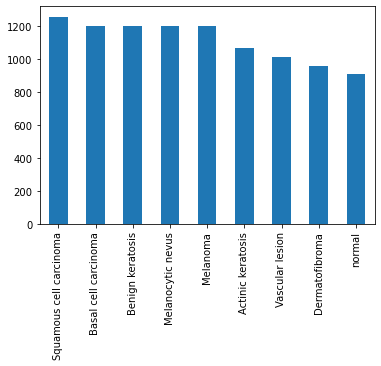

In [58]:
train['label_name'].value_counts().plot.bar()

Creating datablock object from csv file  
- We have used RandomSplitter for splitting training and validation datasets with validation percentage of 20% i-e split ratio is 80% training and 20% validation  
- We performed item level transforms on input data to resize image to 224 pixels
- Also, we performed bathc level transforms to the input data i-e we applied a random resized crop of size 224 pixels using GPU. Also, we performed augmentation transforms and normalized image using statistics from the ImageNet dataset.

In [5]:
def get_x(row): return row['image_id']
def get_y(row): return row['label']

db = DataBlock(blocks = (ImageBlock, CategoryBlock),
              get_x = get_x,
               get_y = get_y,
               splitter = RandomSplitter(valid_pct = 0.2),
               item_tfms = [Resize(224)],
               batch_tfms = [RandomResizedCropGPU(224), *aug_transforms(), 
                            Normalize.from_stats(*imagenet_stats)]            
              )

Creating DataLoader for the training dataset using the previously defined DataBlock.  
Here we have set batch size to 8 considering limited GPU and RAM in colab

In [6]:
dls = db.dataloaders(train, bs = 64)

Displaying a sample of the data contained in DataLoader object stored in dls.  
We are displaying a random batch of data using the show_batch method of DataLoader object

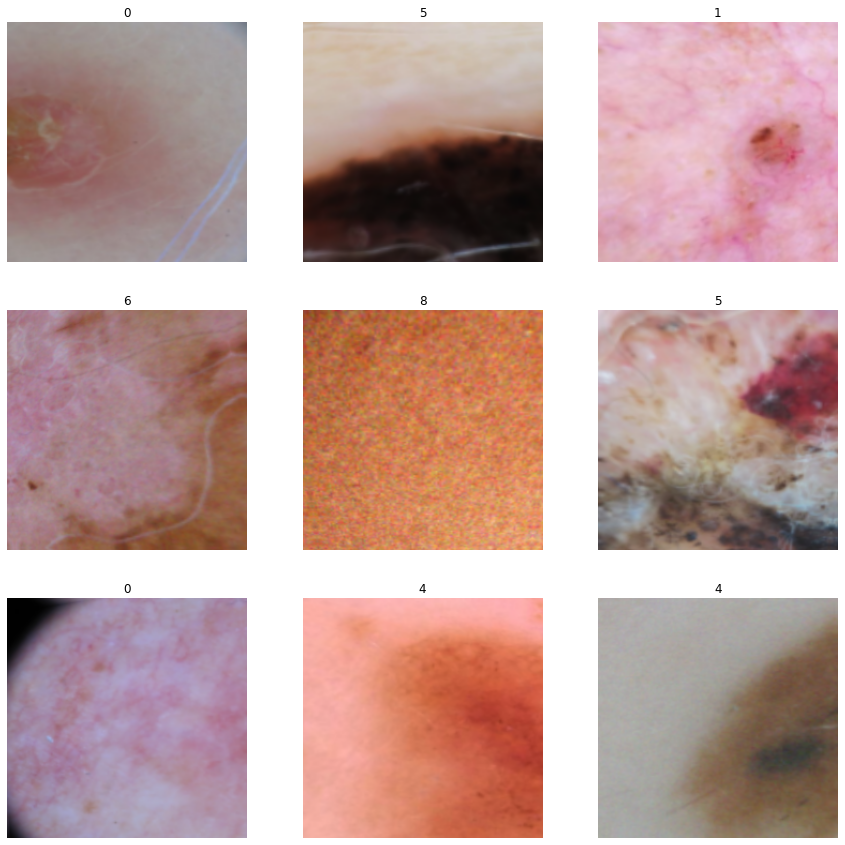

In [10]:
dls.show_batch(figsize = (15,15))

Copying the pretrained model to checkpoints folder 

In [19]:
if not os.path.exists('/root/.cache/torch/hub/checkpoints/'):
        os.makedirs('/root/.cache/torch/hub/checkpoints/')
!cp '/content/drive/MyDrive/SkinDisease/resnet152.pth' '/root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth'

Creating a Learner object using vision_learner from fastai library.
- Here we specify various parameters like:
    - DataLoader object for training and validation data
    - Pretrained model: resnet152
    - Optimization function: ranger (Other optimizers like Adam, SGD were also tried)
    - Loss Function: Label Smoothing Cross Entropy
    - Metrics: accuracy

In [7]:
pre_trained_model = models.vgg16_bn

In [8]:
learn = vision_learner(dls=dls, arch=pre_trained_model, opt_func=ranger, loss_func=LabelSmoothingCrossEntropy(), metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Finetuning the pretrained model using Learner object and our own custom dataset
- Here we have trained for 30 epochs
- Also, we trained for 5 epochs keeping the pretrained weights frozen

In [9]:
learn.fine_tune(40, freeze_epochs = 5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,3.207069,2.454955,0.260370,0.739630,05:04
1,2.579006,1.998763,0.383808,0.616192,04:47
2,2.246144,1.843417,0.438281,0.561719,04:29
3,1.996613,1.688693,0.475262,0.524738,03:16
4,1.781305,1.603572,0.498751,0.501249,03:23


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.659689,1.573117,0.507746,0.492254,04:49
1,1.614860,1.554634,0.516242,0.483758,04:53
2,1.599293,1.529335,0.519740,0.480260,04:55
3,1.533295,1.473295,0.554223,0.445777,04:53
4,1.497931,1.438117,0.565717,0.434283,04:51
5,1.418954,1.443805,0.569215,0.430785,03:33
6,1.361741,1.370787,0.606697,0.393303,03:33
7,1.335170,1.397733,0.588706,0.411294,04:28
8,1.280593,1.362843,0.622689,0.377311,04:51
9,1.239434,1.310562,0.622689,0.377311,03:34


Save the model's state and optimizer's state in file named resnet152

In [10]:
learn.save('model_vgg_own')

Path('models/model_vgg_own.pth')

Displaying results on some random validation subset

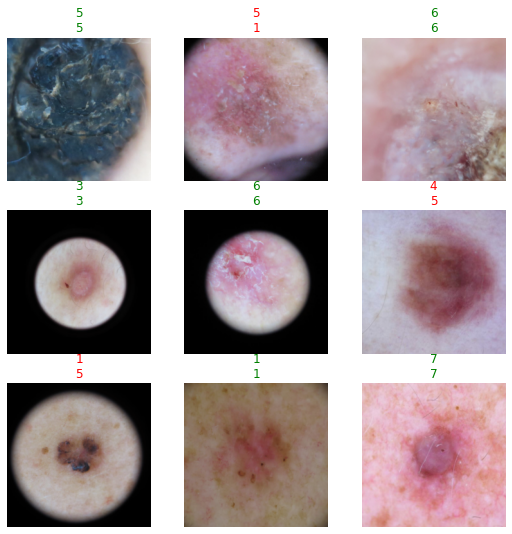

In [11]:
learn.show_results()

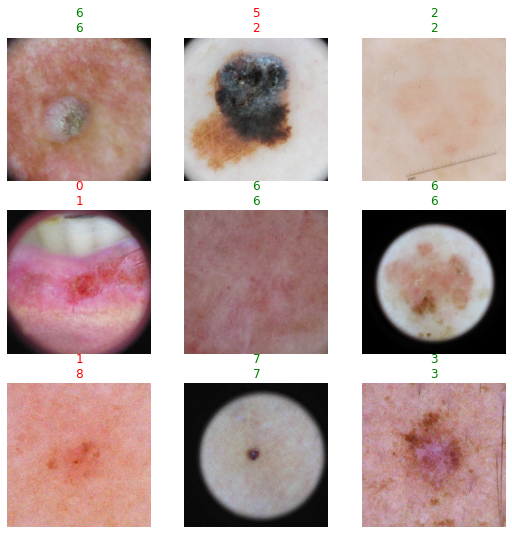

In [40]:
learn.show_results()

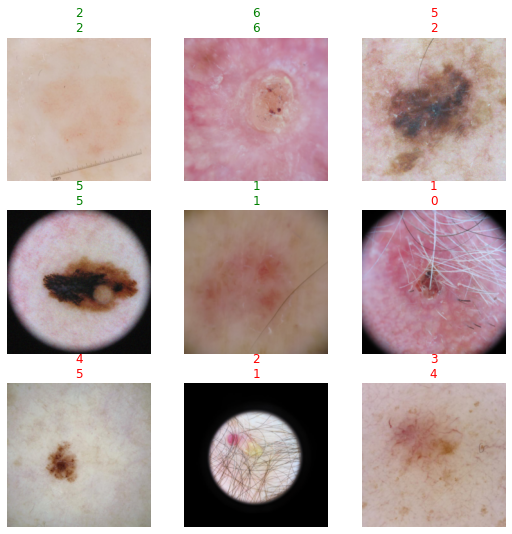

In [41]:
learn.show_results()

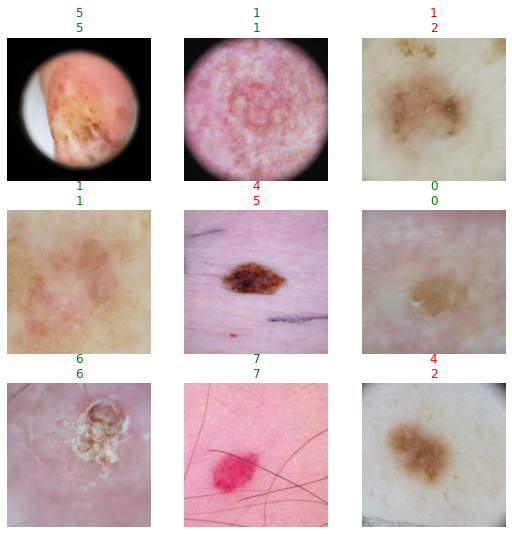

In [42]:
learn.show_results()

In [46]:
mapping = {0: 'Actinic keratosis',
 1: 'Basal cell carcinoma',
 2: 'Benign keratosis',
 3: 'Dermatofibroma',
 4: 'Melanocytic nevus',
 5: 'Melanoma',
 6: 'Squamous cell carcinoma',
 7: 'Vascular lesion',
8: 'Normal'}
mapping

{0: 'Actinic keratosis',
 1: 'Basal cell carcinoma',
 2: 'Benign keratosis',
 3: 'Dermatofibroma',
 4: 'Melanocytic nevus',
 5: 'Melanoma',
 6: 'Squamous cell carcinoma',
 7: 'Vascular lesion',
 8: 'Normal'}

In [29]:
def predict_in_image(test_img):
    pred = learn.predict(test_img)
    index = pred[0]
    prob = pred[2].max()
    print(f"Predicted Disease: {mapping[int(index)]} with probability: {prob.numpy()}")

In [31]:
test_img1 = '/kaggle/input/skindiseases/dataset_1200_complete/Actinic keratosis/ISIC_0024470.jpg'
predict_in_image(test_img1)

Predicted Disease: Actinic keratosis with probability: 0.8796414136886597


In [32]:
test_img2 = '/kaggle/input/skindiseases/dataset_1200_complete/Basal cell carcinoma/ISIC_0024331.jpg'
predict_in_image(test_img2)

Predicted Disease: Basal cell carcinoma with probability: 0.6836801171302795


In [34]:
test_img3 = '/kaggle/input/skindiseases/dataset_1200_complete/Benign keratosis/ISIC_0012086_downsampled.jpg'
predict_in_image(test_img3)

Predicted Disease: Benign keratosis with probability: 0.7174073457717896


In [35]:
test_img4 = '/kaggle/input/skindiseases/dataset_1200_complete/Dermatofibroma/ISIC_0024318.jpg'
predict_in_image(test_img4)

Predicted Disease: Dermatofibroma with probability: 0.9940366744995117


In [37]:
test_img5 = '/kaggle/input/skindiseases/dataset_1200_complete/Melanocytic nevus/ISIC_0000055_downsampled.jpg'
predict_in_image(test_img5)

Predicted Disease: Melanocytic nevus with probability: 0.9810568690299988


In [39]:
test_img6 = '/kaggle/input/skindiseases/dataset_1200_complete/Melanoma/ISIC_0000078_downsampled.jpg'
predict_in_image(test_img6)

Predicted Disease: Melanoma with probability: 0.7242549061775208


In [43]:
test_img7 = '/kaggle/input/skindiseases/dataset_1200_complete/Squamous cell carcinoma/ISIC_0024329.jpg'
predict_in_image(test_img7)

Predicted Disease: Squamous cell carcinoma with probability: 0.8488551378250122


In [44]:
test_img8 = '/kaggle/input/skindiseases/dataset_1200_complete/Vascular lesion/ISIC_0024370.jpg'
predict_in_image(test_img8)

Predicted Disease: Vascular lesion with probability: 0.9863463044166565


In [47]:
test_img9 = '/kaggle/input/skindiseases/dataset_1200_complete/normal/10.png'
predict_in_image(test_img9)

Predicted Disease: Normal with probability: 0.9304837584495544


In [48]:
interp = ClassificationInterpretation.from_learner(learn)

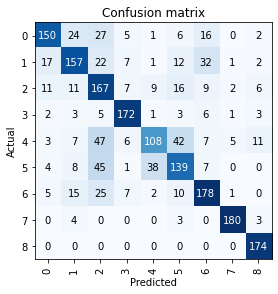

In [49]:
interp.plot_confusion_matrix()

In [59]:
interp.confusion_matrix()

array([[150,  24,  27,   5,   1,   6,  16,   0,   2],
       [ 17, 157,  22,   7,   1,  12,  32,   1,   2],
       [ 11,  11, 167,   7,   9,  16,   9,   2,   6],
       [  2,   3,   5, 172,   1,   3,   6,   1,   3],
       [  3,   7,  47,   6, 108,  42,   7,   5,  11],
       [  4,   8,  45,   1,  38, 139,   7,   0,   0],
       [  5,  15,  25,   7,   2,  10, 178,   1,   0],
       [  0,   4,   0,   0,   0,   3,   0, 180,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174]])

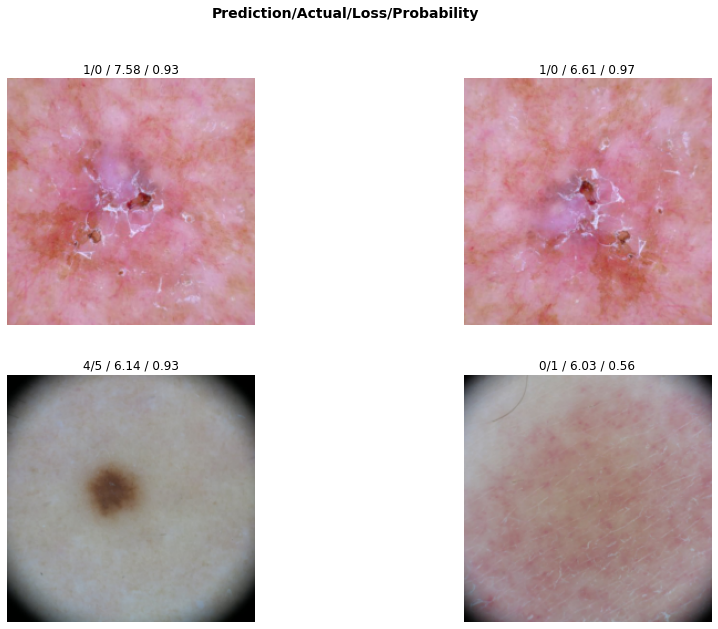

In [60]:
interp.plot_top_losses(4, figsize=(15,10))

In [33]:
learn.export('own_vgg.pkl')

Analyzing the performance of a classification model

In [37]:
interp = ClassificationInterpretation.from_learner(learn)

Plotting the confusion matrix

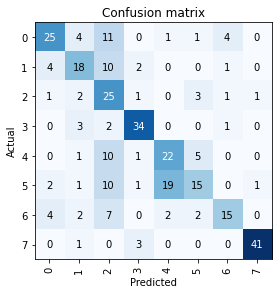

In [38]:
interp.plot_confusion_matrix()

Testing on Local machine

Loading the exported model

In [5]:
import pandas as pd
import numpy as np
import json
from fastai.vision.all import *
from PIL import Image
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [4]:
def get_x(row): return row['image_id']
def get_y(row): return row['label']

In [7]:
def classify_image(img):
    mapping = {0: 'Actinic keratosis',
    1: 'Basal cell carcinoma',
    2: 'Benign keratosis',
    3: 'Dermatofibroma',
    4: 'Melanocytic nevus',
    5: 'Melanoma',
    6: 'Squamous cell carcinoma',
    7: 'Vascular lesion',
    8: 'Normal'}
    print(img)
    pred_idx,_,probs = learn.predict(img)
    pred_class = mapping[int(pred_idx)]
    prob = probs.max()
    prob = prob.numpy()
    return pred_class,prob

In [6]:
learn = load_learner('own_resnet.pkl')

In [8]:
pred_class,prob = classify_image(r"D:\Programming\Ai hackathon\Skin_Cancer_Detection\test_images\actinic_keratosis2.jpg")
print(f"The model predicts the image as: {pred_class} with probability: {prob*100:.2f}%")

D:\Programming\Ai hackathon\Skin_Cancer_Detection\test_images\actinic_keratosis2.jpg


The model predicts the image as: Actinic keratosis with probability: 74.22%
